# Mini Project 1 

# Task 1 :

In [2]:
#Import the pandas module
import pandas as pd

In [3]:
#Read in datasets/yearly_deaths_by_clinic.csv and assign it to the variable yearly
yearly=pd.read_csv(r"C:\Users\Vinu\Desktop\Technocolabs\datasets\yearly_deaths_by_clinic.csv")
#Print out yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


# Task 2 :

In [4]:
#Calculate the proportion of deaths per number of births and store the result in the new column yearly["proportion_deaths"]
yearly["proportion_deaths"]=yearly["deaths"]/yearly["births"]
yearly["proportion_deaths"]

0     0.078063
1     0.157591
2     0.089542
3     0.082357
4     0.069015
5     0.114464
6     0.035217
7     0.075968
8     0.059876
9     0.023004
10    0.020364
11    0.027970
Name: proportion_deaths, dtype: float64

In [5]:
#Extract the rows from clinic 1 into yearly1 and the rows from clinic 2 into yearly2
yearly1=yearly.loc[yearly["clinic"]=="clinic 1"]
yearly2=yearly.loc[yearly["clinic"]=="clinic 2"]
#Print out yearly1
yearly1


,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [6]:
yearly2

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


# Task 3:

In [7]:
#imort matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

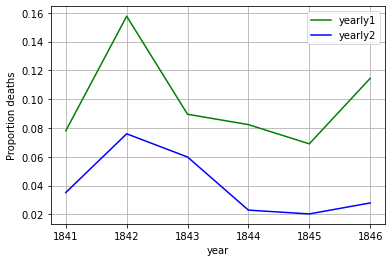

In [8]:
#Plot proportion_deaths by year for the two clinics in a single plot. Use the DataFrame plot method
ax = yearly1.plot(x="year", y="proportion_deaths",label="yearly1",color="green")
yearly2.plot(x="year", y="proportion_deaths",label="yearly2",color="blue",ax=ax)
#Change the y-axis label to "Proportion deaths"
ax.set_ylabel("Proportion deaths")
plt.grid()
plt.show()

# Task 4 :

In [47]:
#Read in datasets/monthly_deaths.csv and assign it to the variable monthly
monthly=pd.read_csv(r"C:\Users\Vinu\Desktop\Technocolabs\datasets\monthly_deaths.csv",parse_dates=['date'])
monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [48]:
#Calculate the proportion of deaths per number of births and store the result in the new column monthly["proportion_deaths"]
monthly["proportion_deaths"]=monthly["deaths"]/monthly["births"]
monthly["proportion_deaths"]

0     0.145669
1     0.075314
2     0.043321
3     0.015686
4     0.007843
        ...   
93    0.029032
94    0.013405
95    0.022333
96    0.030848
97    0.049261
Name: proportion_deaths, Length: 98, dtype: float64

In [49]:
#Print out the first rows in monthly using the head() method
monthly.head(1)

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669


# Task 5 :

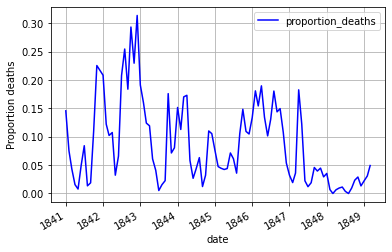

In [50]:
#Plot proportion_deaths by date for the monthly date using the DataFrame plot method
ax = monthly.plot(x="date", y="proportion_deaths",color="blue")
#Change the y-axis label to "Proportion deaths"
ax.set_ylabel("Proportion deaths")
plt.grid()
plt.show()

# Task 6 :

In [51]:
handwashing_start=pd.to_datetime('1847-06-01')
handwashing_start

Timestamp('1847-06-01 00:00:00')

In [52]:
#Split monthly into before_washing
before_washing = monthly[monthly["date"] < handwashing_start]
#Split monthly into before_washing
after_washing = monthly[monthly["date"] >= handwashing_start]

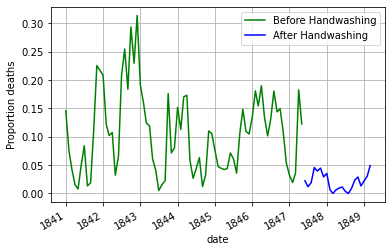

In [54]:
#Plot proportion_deaths in before_washing and after_washing into the same plot. Use the DataFrame plot method
#Plot proportion_deaths by year for the two clinics in a single plot. Use the DataFrame plot method
ax = before_washing.plot(x="date", y="proportion_deaths",label="Before Handwashing",color="green")
after_washing.plot(x="date", y="proportion_deaths",label="After Handwashing",color="blue",ax=ax)
#Change the y-axis label to "Proportion deaths"
ax.set_ylabel("Proportion deaths")
plt.grid()
plt.show()

# Task 7 :

In [55]:
#Select the column proportion_deaths in before_washing and put it into before_proportion
before_proportion=before_washing["proportion_deaths"]
#Select the column proportion_deaths in after_washing and put it into after_proportion
after_proportion=after_washing["proportion_deaths"]
#Calculate the difference in mean monthly proportion of deaths as mean after_proportion minus mean before_proportion
difference=after_proportion.mean()-before_proportion.mean()
difference


-0.08395660751183336

# Task 8 :

In [56]:
#boot_before and boot_after should be sampled with replacement from before_proportion and after_proportion andAppend 3000 bootstrapped differences in means to boot_mean_diff.

boot_mean_diff=[]
for i in range(3000):
    boot_before=before_proportion.sample(frac=1,replace=True)
    boot_after=after_proportion.sample(frac=1,replace=True)
    boot_mean_diff.append(boot_after.mean()-boot_before.mean())
boot_mean_diff

[-0.07922331982201726,
 -0.08533845752910801,
 -0.08365308879510287,
 -0.09025809504674069,
 -0.10115461910895605,
 -0.07956050104642978,
 -0.065453390792691,
 -0.07612831658468101,
 -0.06831880611313071,
 -0.06627349472745588,
 -0.08096015579115959,
 -0.08731060487702358,
 -0.10148281550976446,
 -0.08758410597655489,
 -0.07843312939153675,
 -0.0741967187917978,
 -0.08157259961022598,
 -0.07726993452321128,
 -0.08535131778419064,
 -0.06755341174329237,
 -0.0871744732087363,
 -0.09704984134937816,
 -0.09882708699765637,
 -0.07565635193620233,
 -0.08768386098484716,
 -0.08972224726254349,
 -0.08597391522018817,
 -0.08961843523064239,
 -0.07806474137500397,
 -0.07194361612750165,
 -0.10026157667475019,
 -0.08674163376205075,
 -0.0941657585412784,
 -0.10058092371596836,
 -0.08927004010992909,
 -0.08145909560924688,
 -0.0920917844712944,
 -0.07468882907210014,
 -0.08864768658035586,
 -0.08342860819476162,
 -0.10221334026735025,
 -0.10245000394125425,
 -0.0910228275111139,
 -0.08998257814162

In [57]:
#Calculate a 95% confidence_interval as the 2.5% and 97.5% quantiles of boot_mean_diff
confidence_interval=pd.Series(boot_mean_diff).quantile([0.025,0.975])
confidence_interval

0.025   -0.101690
0.975   -0.067131
dtype: float64

# Task 9 :

In [58]:
#Given the data Semmelweis collected, is it True or False that doctors should wash their hands
doctors_should_wash_their_hands=True